In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("rec_data.csv")
movies_df = pd.read_csv("movies_all.csv").replace(np.nan, 'NaN', regex=True)

processed_df = df.loc[~df[' result'].str.contains("not found|timeout|refused|Unexpected", regex=True)].dropna(axis=0)

rec_movie_list = np.array([item.split()[1:21] for item in processed_df[' result']])
flat_list = []
for item in rec_movie_list:
    for i in item:
        flat_list.append(i)
        
print(processed_df.shape)
print(movies_df.shape)

(10059, 4)
(10000, 45)


(2182,)
[4664, 4321, 3446, 3398, 3237, 2954, 2854, 2653, 2474, 2025, 2006, 1851, 1799, 1754, 1713, 1697, 1668, 1630, 1519, 1477, 1469, 1464, 1369, 1301, 1298]


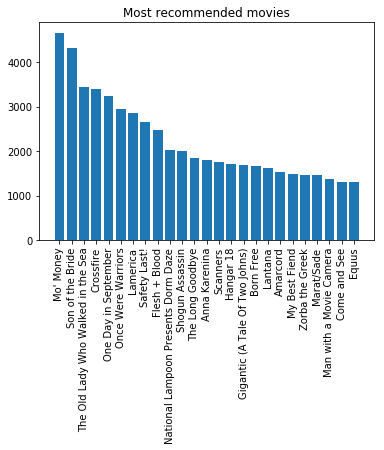

In [149]:
u, indices = np.unique(flat_list, return_inverse=True)

bins = np.bincount(indices)
sorted_bins = np.argsort(-bins, axis=-1, kind='quicksort', order=None)
most_common_movies = u[sorted_bins[0:25]]

print(u.shape)

movie_counts = []
movie_names = []

for movie in most_common_movies:
    movie_counts.append(flat_list.count(movie))
    movie_names.append(movies_df.loc[movies_df['id'] == int(movie)].iloc[0]['title'])
    
print(movie_counts)

plt.bar(movie_names, movie_counts)
plt.title("Most recommended movies")
plt.xticks(rotation='vertical')
plt.show()

489
264
140


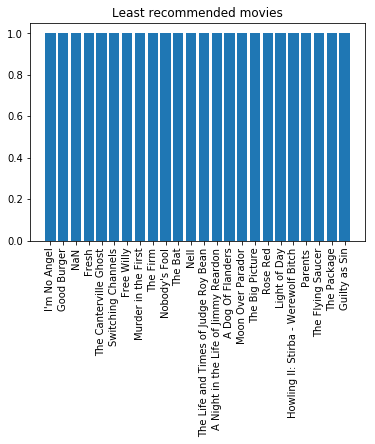

In [158]:
u, indices = np.unique(flat_list, return_inverse=True)

bins = np.bincount(indices)

print(np.count_nonzero(bins == 1))

sorted_bins = np.argsort(bins, axis=-1, kind='quicksort', order=None)
least_common_movies = u[sorted_bins[0:25]]

movie_counts = []
movie_names = []

for movie in least_common_movies:
    movie_counts.append(flat_list.count(movie))
    movie_names.append(movies_df.loc[movies_df['id'] == int(movie)].iloc[0]['title'])

plt.bar(movie_names, movie_counts)
plt.title("Least recommended movies")
plt.xticks(rotation='vertical')
plt.show()